# Portfolio 2: Analysing COVID-19 Data

In this difficult situation, COVID-19 topic is discussed everywhere and anytime. Every night, the news channels tell stories about COVID-19 and its development. There are lots of COVID-19 related graph and chart presented to viewers. This project aims to create the COVID-19 visualisation and try to see the issue from different perspectives.

## Libraries and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

### Getting the Data

In this project, the first dataset is provided by Johns Hopkins University in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). The dataset contains number of COVID-19 confirmed cases per day by country and is updated everyday.   

The second data is world population data provided by UN, [WPP2019](https://population.un.org/wpp/Download/Standard/Population/). It contains number of population per country and projected population.

In [2]:
# The time series covid19 confirmed global dataset was accessed at 22/05/2020
covid = pd.read_csv('data/Portfolio2files/time_series_covid19_confirmed_global_22052020.csv')
un_world_pop_raw = pd.read_csv('data/Portfolio2files/WPP2019_TotalPopulationBySex.csv')

### Data Exploration and Basic Preparation

The format of this data is one row per geographical region with columns for Lat/Long and then one column for each day's data.  Most regions are countries but in some cases, as in Australia, they are states.  

There are several rows that contain the states of a country instead of the country. Because the analysis is based on cases per country, the rows that contain the states data need to be combined first. The dataset also contains nonnumerical data and this data is discarded for the sake of simplicity.

In [3]:
grouped_df = covid.groupby('Country/Region').sum()
grouped_df = grouped_df.drop(columns=['Lat', 'Long'])
transposed_df = grouped_df.T
print('Number of countries in the dataset:', len(grouped_df.index), '\n')
print('The sample of the dataset is diplayed below:')
display(grouped_df.sample(5))

Number of countries in the dataset: 188 

The sample of the dataset is diplayed below:


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Laos,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
Kosovo,0,0,0,0,0,0,0,0,0,0,...,919,919,944,944,944,955,955,989,989,1003
Djibouti,0,0,0,0,0,0,0,0,0,0,...,1256,1268,1284,1309,1331,1401,1518,1618,1828,2047
Benin,0,0,0,0,0,0,0,0,0,0,...,327,327,339,339,339,339,339,130,130,135
Bosnia and Herzegovina,0,0,0,0,0,0,0,0,0,0,...,2158,2181,2218,2236,2267,2290,2304,2321,2338,2350


## Analysis

### Australia Covid-19 Cases

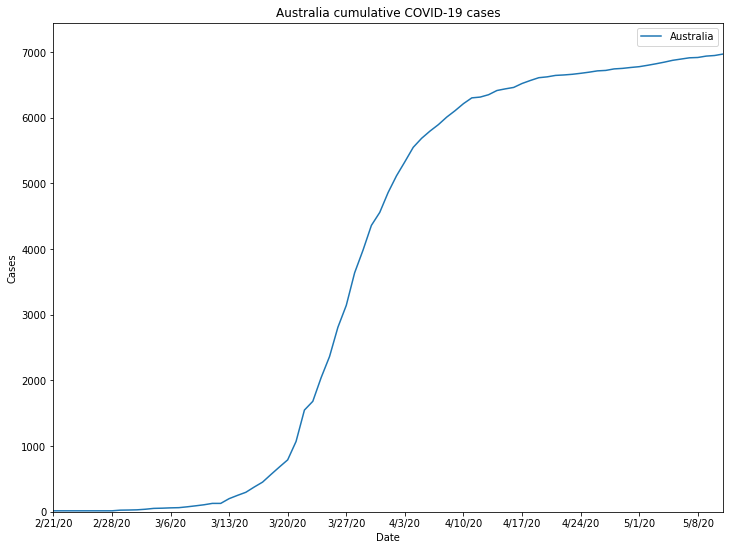

In [4]:
aus_cases = transposed_df['Australia']
plt.figure(figsize=(12,9))
plt.title('Australia cumulative COVID-19 cases')
plt.plot(aus_cases, label='Australia')
plt.xticks(np.arange(30, 115, 7))
plt.xlim(30, 110)
plt.ylim(0)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

The plot shows that the cumulative number of cases is slowing down. The number of cases starts to grow in the beginning of March, increasing rapidly from 3rd week of March until 2nd week of April. 

### Australia compared to other countries

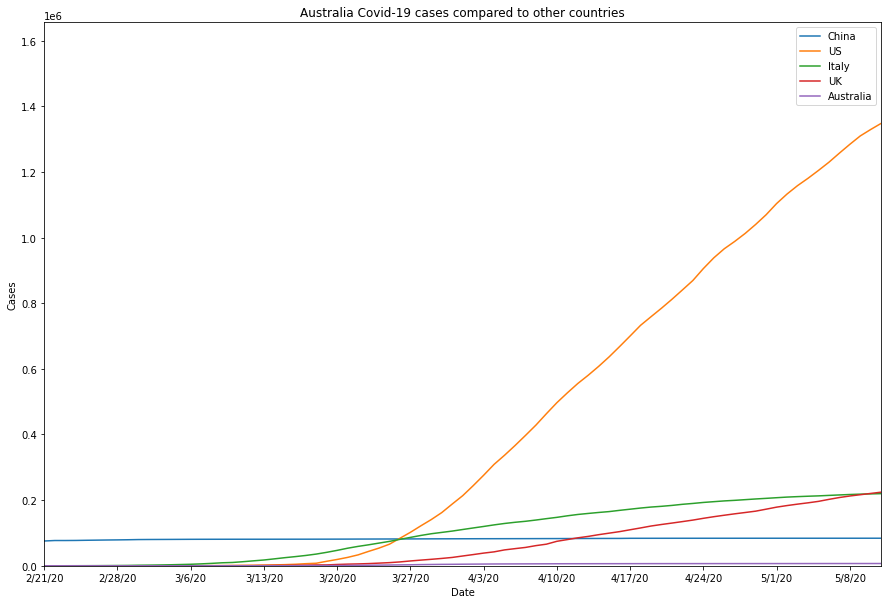

In [5]:
chi_cases = transposed_df['China']
us_cases = transposed_df['US']
ita_cases = transposed_df['Italy']
uk_cases = transposed_df['United Kingdom']
aus_cases = transposed_df['Australia']

plt.figure(figsize=(15,10))
plt.title('Australia Covid-19 cases compared to other countries')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(chi_cases, label='China')
plt.plot(us_cases, label='US')
plt.plot(ita_cases, label='Italy')
plt.plot(uk_cases, label='UK')
plt.plot(aus_cases, label='Australia')
plt.xticks(np.arange(30, 115, 7))
plt.xlim(30, 110)
plt.ylim(0)
plt.legend()
plt.show()

The chart shows that Australia number of Covid-19 cases is relatively very low compared to countries like US and China. The US line graph shows that the US COVID-19 number of cases is still increasing significantly and doesn't show any sign of flattening. On the other hand, China number of cases has flatten since February and doesn't grow anymore.

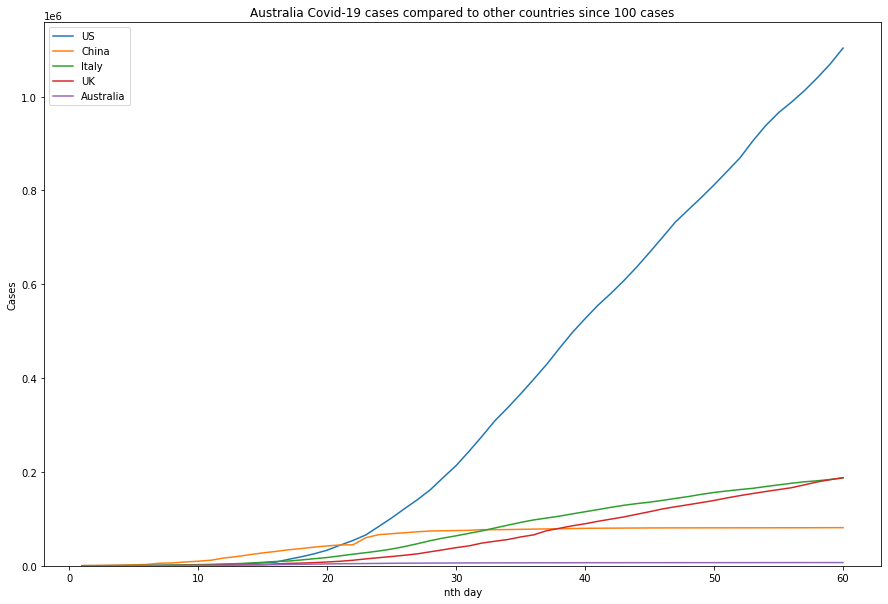

In [6]:
# prepare us since 100 cases dataframe
us_100_sr = transposed_df['US'][transposed_df['US'] > 100].iloc[:60]
us_100_df = pd.DataFrame(us_100_sr)
us_100_df['nth day'] = list(range(1, 61))
us_100_df = us_100_df.set_index('nth day')

# prepare china since 100 cases dataframe
china_100_sr = transposed_df['China'][transposed_df['China'] > 100].iloc[:60]
china_100_df = pd.DataFrame(china_100_sr)
china_100_df['nth day'] = list(range(1, 61))
china_100_df = china_100_df.set_index('nth day')

# prepare italy since 100 cases dataframe
italy_100_sr = transposed_df['Italy'][transposed_df['Italy'] >= 100].iloc[:60]
italy_100_df = pd.DataFrame(italy_100_sr)
italy_100_df['nth day'] = list(range(1, 61))
italy_100_df = italy_100_df.set_index('nth day')

# prepare uk since 100 cases dataframe
uk_100_sr = transposed_df['United Kingdom'][transposed_df['United Kingdom'] >= 100].iloc[:60]
uk_100_df = pd.DataFrame(uk_100_sr)
uk_100_df['nth day'] = list(range(1, 61))
uk_100_df = uk_100_df.set_index('nth day')

# prepare australia since 100 cases dataframe
australia_100_sr = transposed_df['Australia'][transposed_df['Australia'] >= 100].iloc[:60]
australia_100_df = pd.DataFrame(australia_100_sr)
australia_100_df['nth day'] = list(range(1, 61))
australia_100_df = australia_100_df.set_index('nth day')

# merge all dataframe
since_100_df = pd.merge(us_100_df, china_100_df, left_index=True, right_index=True)
since_100_df = pd.merge(since_100_df, italy_100_df, left_index=True, right_index=True)
since_100_df = pd.merge(since_100_df, uk_100_df, left_index=True, right_index=True)
since_100_df = pd.merge(since_100_df, australia_100_df, left_index=True, right_index=True)

# plot
plt.figure(figsize=(15,10))
plt.title('Australia Covid-19 cases compared to other countries since 100 cases')
plt.xlabel('nth day')
plt.ylabel('Cases')
plt.plot(since_100_df['US'], label='US')
plt.plot(since_100_df['China'], label='China')
plt.plot(since_100_df['Italy'], label='Italy')
plt.plot(since_100_df['United Kingdom'], label='UK')
plt.plot(since_100_df['Australia'], label='Australia')
plt.ylim(0)
plt.legend()
plt.show()

The chart shows that number of cases of Australia, US, China, Italy and UK since the number of COVID-19 cases reach 100 cases. China number of cases had a liitle dip on the 23rd day and from that date, the number of cases flatten. Compared to US, China, Italy and UK. Australia is the country with the lowest number of cases and the lowest growth.

### COVID-19 Cases per 1 Million Population 

In [7]:
# prepare the population dataframe from UN world population, edit several row index so the merge operation can fit perfectly
un_world_pop = un_world_pop_raw[(un_world_pop_raw.Time == 2020) & (un_world_pop_raw.Variant=='No change')]
un_world_pop = un_world_pop.loc[:,['Location', 'PopTotal']]
un_world_pop.rename(columns={'Location': 'Country/Region'}, inplace=True)
un_world_pop.set_index('Country/Region', inplace=True)
un_world_pop.rename(index={'Bolivia (Plurinational State of)': 'Bolivia', 
                           'Brunei Darussalam': 'Brunei', 
                           "Côte d'Ivoire": "Cote d'Ivoire", 
                           'Iran (Islamic Republic of)': 'Iran', 
                           'Republic of Korea': 'Korea, South',
                           "Lao People's Democratic Republic": 'Laos',
                           'Republic of Moldova': 'Moldova', 
                           'Russian Federation': 'Russia', 
                           'Syrian Arab Republic': 'Syria',
                           'China, Taiwan Province of China': 'Taiwan*',
                           'United Republic of Tanzania': 'Tanzania',
                           'United States of America': 'US',
                           'Venezuela (Bolivarian Republic of)': 'Venezuela', 
                           'Viet Nam': 'Vietnam'},
                    inplace=True)

# covid countries population dataframe preparation
covid_grouped = covid.groupby('Country/Region').sum()
covid_pop = pd.merge(grouped_df, un_world_pop, left_index=True, right_index=True)
covid_pop = covid_pop.loc[:,['PopTotal']] / 1000 # change unit to 1 million people
covid_pop.sample(5)

# most recent covid cases per countries dataframe
cov_recent_per_countries = grouped_df.iloc[:,-1:]

# countries sorted by cases per million
pd.set_option('display.float_format', lambda x: '%.2f' %x)
cov_per_million_df = pd.merge(cov_recent_per_countries, covid_pop, left_index=True, right_index=True)
cov_per_million_df['PerMillion'] = cov_per_million_df.iloc[:,0] / cov_per_million_df.loc[:,'PopTotal']
over_1million_countries_df = cov_per_million_df[cov_per_million_df.PopTotal > 1].sort_values('PerMillion', ascending=False).head(20)
all_countries_df = cov_per_million_df.sort_values('PerMillion', ascending=False).head(20)

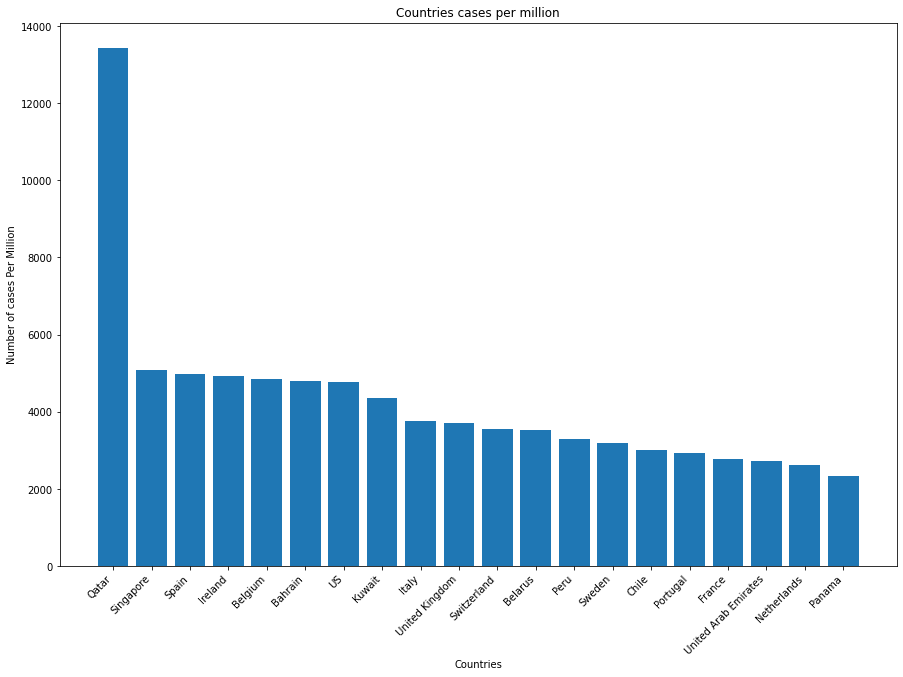

In [8]:
plt.figure(figsize=(15,10))
plt.title('Countries cases per million')
plt.xlabel('Countries')
plt.ylabel('Number of cases Per Million')
plt.xticks(rotation=45, horizontalalignment='right')
plt.bar(over_1million_countries_df.index, over_1million_countries_df['PerMillion'])
plt.show()

The bar chart above shows number of COVID-19 cases per 1 million population. The bar chart contains countries with population over 1 million people and the countries with population below 1 million is excluded.

The bar chart shows that country with the highest COVID-19 cases per 1 million population is Qatar, followed by Singapore and Spain. Currently, most of media's attention regarding Covid-19 cases is drawn at US, China, Italy and UK, but this bar chart shows the COVID-19 confirmed cases from different perspective.

### What will happen next? US and China comparison

In [9]:
# prepare new data frame for model
us_cases_log_sr = np.log(us_cases)
us_cases_log_df = pd.DataFrame(us_cases_log_sr)
us_cases_log_df['nth day'] = list(range(len(us_cases_log_sr)))

# create and load linear regression model
reg = linear_model.LinearRegression()
reg.fit(us_cases_log_df[['nth day']], us_cases_log_df['US'])
predicted = reg.predict(us_cases_log_df[['nth day']])

# Measure the accuracy
mse = mean_squared_error(predicted, us_cases_log_df['US'])
r2 = r2_score(predicted, us_cases_log_df['US'])
print('The US Linear Regression model MSE: %.3f' %(mse))
print('\nThe r2 score: %.3f' %(r2))

The US Linear Regression model MSE: 1.824

The r2 score: 0.922


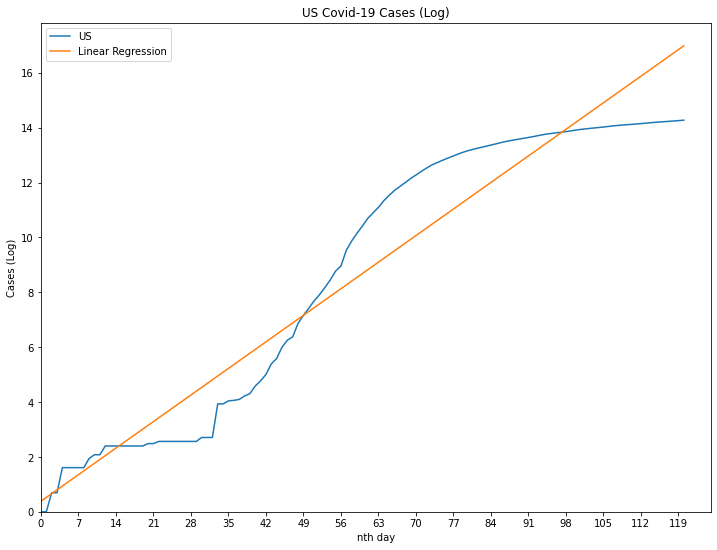

In [10]:
plt.figure(figsize=(12,9))
plt.title('US Covid-19 Cases (Log)')
plt.xlabel('nth day')
plt.ylabel('Cases (Log)')
plt.plot(us_cases_log_df['nth day'], us_cases_log_df['US'] , label='US')
plt.plot(predicted, label='Linear Regression')
plt.xticks(np.arange(0, 125, 7))
plt.xlim(0, 125)
plt.ylim(0)
plt.legend()
plt.show()

In [11]:
# prepare china new dataframe
china_cases_log_sr = np.log(chi_cases)
china_cases_log_df = pd.DataFrame(china_cases_log_sr)
china_cases_log_df['nth day'] = list(range(len(us_cases_log_sr)))

# load china data to us model
china_predicted = reg.predict(china_cases_log_df[['nth day']])

# Measure the accuracy
mse = mean_squared_error(china_predicted, china_cases_log_df['China'])
r2 = r2_score(china_predicted, china_cases_log_df['China'])
print('The US Linear Regression model loaded with China data mse: %.3f' %(mse))
print('\nThe r2 score: %.3f' %(r2))


The US Linear Regression model loaded with China data mse: 23.299

The r2 score: 0.001


In [12]:
china_reg = linear_model.LinearRegression()
china_reg.fit(china_cases_log_df[['nth day']], china_cases_log_df['China'])
china_predicted_china_model = china_reg.predict(china_cases_log_df[['nth day']])


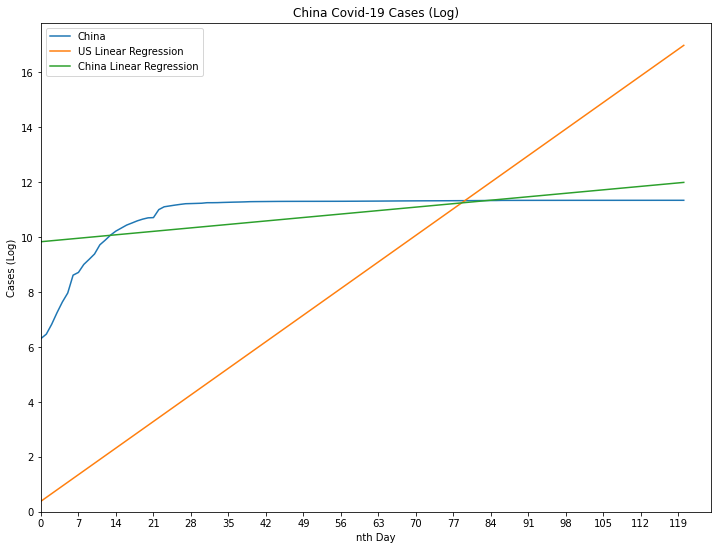

In [13]:
plt.figure(figsize=(12,9))
plt.title('China Covid-19 Cases (Log)')
plt.xlabel('nth Day')
plt.ylabel('Cases (Log)')
plt.plot(china_cases_log_df['nth day'], china_cases_log_df['China'] , label='China')
plt.plot(china_predicted, label='US Linear Regression')
plt.plot(china_predicted_china_model, label='China Linear Regression')
plt.xticks(np.arange(0, 125, 7))
plt.xlim(0, 125)
plt.ylim(0)
plt.legend()
plt.show()

In [14]:
display(china_cases_log_df.loc[['5/21/20']])
print('Number of cases on day 120th based on US Linear Regression Model', reg.predict(us_cases_log_df[['nth day']])[120])
print('The difference is ',  reg.predict(us_cases_log_df[['nth day']])[120] - 11.34)

,China,nth day
5/21/20,11.34,120


Number of cases on day 120th based on US Linear Regression Model 16.979454458055866
The difference is  5.639454458055866


The line graph shows China number of cases in logarithmic scale, US linear regression model and China linear regression model. China number of COVID-19 cases has flatten significanly and does not grow exponentially anymore. There is a big gap between China number of cases and US linear regression model that shows this. The difference between US linear regression model and China number of cases on day 120th is 5.63 in logarithmic scale. If China had not done serious effort to fight the COVID-19, using US model, there would have been additional 426579 (10 ^ 5.63) new cases. 

## Conclusion

Looking at an issue from different perspective is one of the things that can be learned in this project. Changing of perspectiv happens  when looking at COVID-19 cases per 1 million instead of total number of cases. It appears that Qatar is one of the countries with the worst COVID-19 impact. Lastly, US is the country with the most number of COVID-19 cases and it is still growing significantly. There would have beeen 426000 new cases if China had been modeled using US model